In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#matrices = [np.array([[0.6,0.1],[0.1,0.7]]),
#           np.array([[0.78,0.4],[0.4,0.84]]),
#           np.array([[0.8,0.5],[0.5,0.8]]),
#           np.array([[0.62,0.41],[0.41,0.6]]),
#           np.array([[0.87,0.6],[0.6,0.5]])]

def generate_33_symmetric_matrix(n):
    symmetric_matrices = []

    for _ in range(n):
        random_matrix = np.random.rand(3, 3)
        symmetric_matrix = 0.5 * (random_matrix + random_matrix.T)
        symmetric_matrices.append(symmetric_matrix)

    return symmetric_matrices


# Working Slow code

In [ ]:
num_steps = 500
num_nodes = 500
initial_states = np.array([np.random.choice([0,1,2]) for _ in range(num_nodes)])
num_groups = 3
symmetric_matrices = generate_33_symmetric_matrix(num_steps)



transition_matrix = np.array([[0.8 , 0.05 , 0.15],[0.2,0.75,0.05],[0.25,0.2,0.55]])


# Initial states for each node
initial_states = np.random.choice([0, 1, 2], size=num_nodes)


# Initialize an array to store the Markov chains for each node
markov_chains = np.zeros((num_nodes, num_steps), dtype=int)

# Generate Markov chains
for node in range(num_nodes):
    current_state = initial_states[node]
    for step in range(num_steps):
        markov_chains[node, step] = current_state
        current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])



## Creating graphs and plotting number of triangles

def edge_density_dynsbm(num_nodes, num_steps, Z_nodes_time, symmetric_matrices, initial_states, num_groups=3, plot_networks = False):
    edge_density_list = []
    for time in range(num_steps):
        edge_time = np.zeros(shape=(num_nodes, num_nodes))
        for i in range(num_nodes):
            for j in range(num_nodes):
                q = Z_nodes_time[i, time]
                l = Z_nodes_time[j, time]
                beta_ql_t = symmetric_matrices[time][q, l]
                edge_time[i, j] = int(np.random.binomial(n=1, p=beta_ql_t, size=1)[0])
        edge_density_list.append(nx.density(nx.from_numpy_array(edge_time, create_using=nx.Graph)))
    
    return np.mean(np.array(edge_density_list))


#den_list = edge_density_dynsbm(num_nodes = num_nodes, num_steps = num_steps, 
#                   Z_nodes_time = markov_chains, symmetric_matrices= symmetric_matrices,
#                   initial_states= initial_states,num_groups=3) 


In [ ]:
plt.plot(range(1, num_steps+1), den_list)
plt.xlabel('Time')
plt.ylabel('Edge Density')
plt.show()

In [ ]:
import multiprocessing

In [ ]:
def parallel_func(why):
    print(why)
    return edge_density_dynsbm(num_nodes = num_nodes, num_steps = num_steps, 
                   Z_nodes_time = markov_chains, symmetric_matrices= symmetric_matrices,
                   initial_states= initial_states,num_groups=3) 

In [ ]:
num_processes = 4
pool = multiprocessing.Pool(processes=num_processes)
results = pool.map(parallel_func, range(100))
pool.close()
#pool.join()

# Working Faster code

In [ ]:

def generate_33_symmetric_matrix(n):
    random_matrices = np.random.rand(n, 3, 3)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    return symmetric_matrices

num_steps = 500
num_nodes = 500
num_groups = 3

# Generate symmetric matrices
symmetric_matrices = generate_33_symmetric_matrix(num_steps)

# Transition matrix
transition_matrix = np.array([[0.8, 0.05, 0.15], [0.2, 0.75, 0.05], [0.25, 0.2, 0.55]])

# Initial states for each node
initial_states = np.random.choice([0, 1, 2], size=num_nodes)



In [ ]:
def edge_density_dynsbm_fun(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix):
    # Initialize edge density list
    edge_density_list = []

    # Iterate over steps
    for step in range(num_steps):
        if step == 0:
            current_states = initial_states.copy()
            previous_states = current_states.copy()

            # Compute beta_ql_t for all node pairs
            beta_ql_t = symmetric_matrices[step][previous_states[:, None], previous_states]

            # Generate edge time matrix
            edge_time = np.random.binomial(n=1, p=beta_ql_t)

            # Compute edge density
            edge_density_list.append(nx.density(nx.from_numpy_array(edge_time, create_using=nx.Graph)))
        else:
            previous_states = current_states.copy()

            # Compute beta_ql_t for all node pairs
            beta_ql_t = symmetric_matrices[step][previous_states[:, None], previous_states]

            # Generate edge time matrix
            edge_time = np.random.binomial(n=1, p=beta_ql_t)

            # Compute edge density
            edge_density_list.append(nx.density(nx.from_numpy_array(edge_time, create_using=nx.Graph)))

            #current_states = np.random.choice([0, 1, 2], size=num_nodes, p=transition_matrix[previous_states[:, None], :].T)

            for i in range(num_nodes):
                current_states[i] = np.random.choice([0, 1, 2], p=transition_matrix[previous_states[i]])
                
    return np.mean(np.array(edge_density_list))


In [ ]:
mean_densities = []
for sim in range(30):
    print("Simulation number ", sim)
    mean_densities.append(edge_density_dynsbm_fun(initial_states = initial_states, 
                         num_steps = 500,
                         num_nodes = 400,
                         symmetric_matrices = symmetric_matrices,
                         transition_matrix = transition_matrix))

In [ ]:
plt.hist(mean_densities, bins=15)

In [ ]:
import multiprocessing as mp


with mp.Pool(mp.cpu_count()) as pool:
        results = pool.starmap(edge_density_dynsbm_fun, [(initial_states, num_steps, num_nodes, symmetric_matrices, transition_matrix) for _ in range(num_simulations)])

# Values of edge densities

## nodes = 400, timestamps = 500

In [2]:
#file_1 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results1_n400_T500_seed103.npy")
#file_2 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results2_n400_T500_seed103.npy")
#file_3 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results3_n400_T500_seed103.npy")
#file_4 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results4_n400_T500_seed103.npy")
#file_5 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results5_n400_T500_seed103.npy")
#file_6 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results6_n400_T500_seed103.npy")
#file_7 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results7_n400_T500_seed103.npy")
#file_8 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/results8_n400_T500_seed103.npy")


#results_103 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Colab edge density data/pycharm_results.npy")
results_108 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Final simulations/full_edge_density_seed_108.npy")

In [ ]:
#results = np.concatenate((file_1, file_2, file_3, file_4, file_5, file_6, file_7, file_8), axis = 0)

In [3]:
results_108.shape

(850, 500)

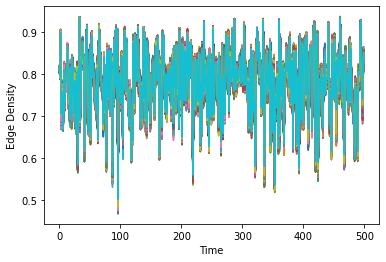

In [4]:
for i in range(results_108.shape[0]):
    plt.plot(range(results_108.shape[1]), results_108[i,])

plt.xlabel("Time")
plt.ylabel("Edge Density")
plt.show()

In [ ]:
for i in range(1000):
    plt.plot(range(500), results_108[i,])
plt.xlabel("Time")
plt.ylabel("Edge Density")
plt.show()

In [ ]:
plt.plot(range(500), np.mean(results, axis = 0))

In [ ]:
plt.hist(np.mean(results_108, axis =1), bins = 35)
plt.xlabel("Edge density")
plt.show()

In [ ]:
plt.hist(np.mean(results_108, axis =1), bins = 35)
plt.xlabel("Edge density")
plt.show()

In [ ]:
plt.hist(500*(np.mean(results_103, axis =1) - np.mean(np.mean(results_103, axis =1))), bins=30)

In [ ]:
print("Variance of average edge density: ", np.var(results_108[:,499]))
print("Mean of edge density at t = 500: ", np.mean(results_108[:,499]))

plt.hist(np.mean(results_108, axis =1), bins = 50, alpha = 0.4, color = "red", label = "Edge densities")
plt.hist(np.random.normal(loc = np.mean(results_103, axis =1), scale = np.var(np.mean(results_103, axis =1)), size = 1000),
         bins = 50, alpha = 0.4, color = "yellow", label = "Normal dist")
plt.legend()
plt.show()

In [ ]:
plt.hist((np.mean(results_108, axis =1) - np.mean(np.mean(results_108, axis =1))), bins = 50)
plt.xlabel("Average edge densities")
plt.show()

In [ ]:
print("Variance of avg. edge density: ", np.var(np.mean(results_108, axis =1)))
print("Mean of avg. edge density: ", np.mean(np.mean(results_108, axis =1)))

In [ ]:
print("Variance of avg. edge density: ", np.var(np.mean(results_103, axis =1)))
print("Mean of avg. edge density: ", np.mean(np.mean(results_103, axis =1)))
plt.hist(np.mean(results_103, axis =1), bins = 50, label = "Edge densities")
plt.show()

Variance of avg. edge density:  1.5568642972996611e-07
Mean of avg. edge density:  0.7811996524251804


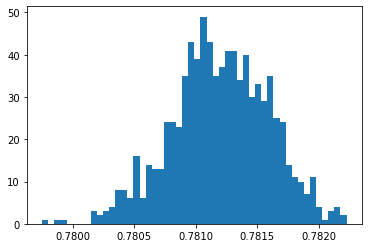

In [59]:
print("Variance of avg. edge density: ", np.var(np.mean(results_108, axis =1)))
print("Mean of avg. edge density: ", np.mean(np.mean(results_108, axis =1)))
plt.hist(np.mean(results_108, axis =1), bins = 50, label = "Edge densities")
plt.show()

Variance of edge density at t= 500:  2.1383663519179885e-05
Mean of edge density at t = 500:  0.8478525726079905


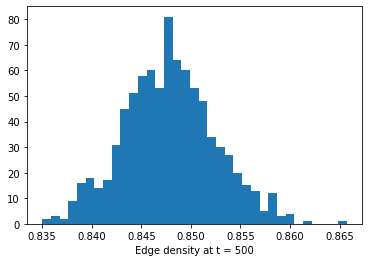

In [42]:
print("Variance of edge density at t= 500: ", np.var(results_108[:,499]))
print("Mean of edge density at t = 500: ", np.mean(results_108[:,499]))

plt.hist(results_108[:,499], bins = 35)
# plt.hist(np.random.normal(size = 1000, loc = np.mean(results_103[:,499]), scale = np.var(results_103[:,499])), bins = 40, alpha = 0.4, color = "yellow")
plt.xlabel("Edge density at t = 500")
plt.show()

#plt.hist(np.random.normal(loc = 0, scale = np.var(results[:,499]), size = 1000), bins = 50, alpha = 0.3, color = "red")

In [ ]:
print("Variance of edge density at t= 500: ", np.var(results_108[:,499]))
print("Mean of edge density at t = 500: ", np.mean(results_108[:,499]))

plt.hist(results_108[:,499], bins = 40)
# plt.hist(np.random.normal(size = 1000, loc = np.mean(results_103[:,499]), scale = np.var(results_103[:,499])), bins = 40, alpha = 0.4, color = "yellow")
plt.xlabel("Edge density at t = 500")
plt.show()


## Final time distribution

In [24]:
results_108 = np.load("D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Final simulations/full_edge_density_seed_108.npy")

In [25]:
results_108.shape

(850, 500)

In [26]:
final_time_edge_dens = results_108[:,results_108.shape[1]-1]

In [35]:
np.sum(final_time_edge_dens==results_108[:,-1])

850

In [9]:
def generate_33_symmetric_matrix(n):
    np.random.seed(108)
    random_matrices = np.random.rand(n, 3, 3)
    symmetric_matrices = 0.5 * (random_matrices + np.transpose(random_matrices, (0, 2, 1)))
    np.random.seed(108)
    diag_vals = np.random.uniform(low=0.55, high=0.9, size=3)
    for i in range(n):
        np.fill_diagonal(symmetric_matrices[i], diag_vals)
    return symmetric_matrices

final_matrix = (generate_33_symmetric_matrix(results_108.shape[1]))[results_108.shape[1]-1]

In [36]:
pycharm_matrices = np.load('D:/Rohan/Maths/MStat/Final Project/Dynamic Networks/Codes basic/Final simulations/symm_matrices.npy')

In [47]:
final_matrix = pycharm_matrices[-1]
print(final_matrix)

[[0.70123892 0.56325762 0.72000887]
 [0.56325762 0.61097534 0.40643682]
 [0.72000887 0.40643682 0.60983029]]


In [38]:
transition_matrix = np.array([[0.8, 0.05, 0.15], [0.2, 0.75, 0.05], [0.25, 0.2, 0.55]])
transition_matrix_power = np.linalg.matrix_power(transition_matrix, 499)

In [48]:
first_term_expected_density = (1/3)*np.dot(np.array([1,1,1]), transition_matrix_power)

In [49]:
final_time_expected_edge_density = np.dot(np.dot(first_term_expected_density, final_matrix), first_term_expected_density.T)

In [54]:
np.mean(final_time_edge_dens)/final_time_expected_edge_density

1.3603038868616795

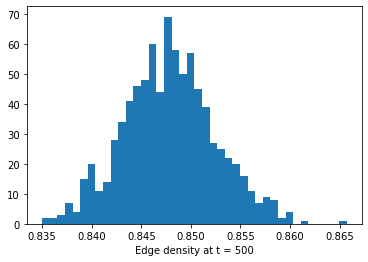

In [55]:
plt.hist(results_108[:,results_108.shape[1]-1], bins = 40)
plt.xlabel("Edge density at t = 500")
plt.show()

In [58]:
np.sum(pycharm_matrices, axis = 0)

array([[350.61946098, 247.98701546, 251.93658205],
       [247.98701546, 305.48767106, 252.44316523],
       [251.93658205, 252.44316523, 304.91514492]])

In [60]:
avg_symm_matrices = (1/500) *np.sum(pycharm_matrices, axis = 0)
np.dot(np.dot(first_term_expected_density, avg_symm_matrices), first_term_expected_density.T)

0.5685029248035773

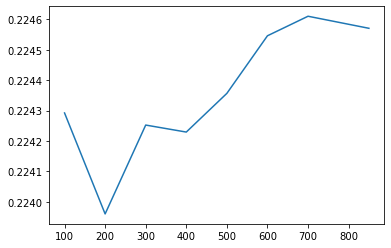

In [46]:
difference = []
for i in [100,200,300,400,500,600,700,850]:
    avg = np.mean(final_time_edge_dens[range(i)])
    difference.append(avg - final_time_expected_edge_density)

plt.plot([100,200,300,400,500,600,700,850], difference)
plt.show()